<a href="https://colab.research.google.com/github/sofiagpmg/Data-Visualization/blob/main/albert1_Simple_Transformer_20210415.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip3 install --upgrade transformers
!pip install simpletransformers

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!pip3 install sentencepiece

In [10]:
import pandas as pd
import numpy as np
import sklearn
from tqdm import tqdm, notebook
from tqdm import tqdm


In [11]:

df = pd.read_csv('/content/drive/MyDrive/BERT_ICD10 classification/mtcompare_m3.csv',encoding = 'iso-8859-1',names=['id', 'text', 'ICD_Chapter', 'label'])
df.head()

,id,text,ICD_Chapter,label
0,id,text,ICD_Chapter,label
1,PAT001,subjective this 23-year-old white female prese...,Diseases of the respiratory system,1
2,PAT002,history a 34-year-old male presents today self...,Diseases of the respiratory system,1
3,PAT003,chief complaint this 5-year-old male presents ...,Diseases of the respiratory system,1
4,PAT004,history i had the pleasure of meeting and eval...,Diseases of the respiratory system,1


In [12]:
df.columns

Index(['id', 'text', 'ICD_Chapter', 'label'], dtype='object')

In [13]:
df = df.iloc[1:]

In [14]:
df.head()

,id,text,ICD_Chapter,label
1,PAT001,subjective this 23-year-old white female prese...,Diseases of the respiratory system,1
2,PAT002,history a 34-year-old male presents today self...,Diseases of the respiratory system,1
3,PAT003,chief complaint this 5-year-old male presents ...,Diseases of the respiratory system,1
4,PAT004,history i had the pleasure of meeting and eval...,Diseases of the respiratory system,1
5,PAT005,history a 55-year-old female presents self-ref...,Diseases of the respiratory system,1


In [15]:
df = df[['text', 'label']]

In [16]:
df.label = pd.to_numeric(df.label, errors='coerce')
print(df.dtypes)

text     object
label     int64
dtype: object


In [17]:
sorted(df.label.unique())
num_labels = df.label.nunique()
num_labels

7

In [18]:
possible_labels = df.label.unique()
print(possible_labels)

[1 4 0 6 5 2 3]


In [19]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [20]:
df['label'] = df.label.replace(label_dict)

In [21]:
from sklearn.model_selection import train_test_split
#target = 'label'

train_df, eval_df = train_test_split(df, test_size=0.2,stratify=df.label.values)

In [22]:

from simpletransformers.classification import ClassificationModel
model_args = {
    "num_train_epochs": 3,
    "learning_rate": 2e-4,
    'overwrite_output_dir':True
}

# Create a ClassificationModel
model = ClassificationModel('albert', 'albert-base-v1', num_labels=num_labels, use_cuda=False, args={'overwrite_output_dir':True})

Downloading:   0%|          | 0.00/684 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of the model checkpoint at albert-base-v1 were not used when initializing AlbertForSequenceClassification: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

Downloading:   0%|          | 0.00/760k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

In [23]:
%%time
# Train the model
model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:449: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2992 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/374 [00:00<?, ?it/s]

CPU times: user 48min 22s, sys: 45.9 s, total: 49min 8s
Wall time: 49min 2s


(374, 1.3905128344176287)

In [24]:
%%time
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/748 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/94 [00:00<?, ?it/s]

CPU times: user 4min 1s, sys: 1.62 s, total: 4min 2s
Wall time: 4min 3s


In [25]:
from sklearn.metrics import f1_score, accuracy_score, classification_report


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(eval_df, f1=f1_multiclass, acc=accuracy_score)


/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/748 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/94 [00:00<?, ?it/s]

In [26]:
result

{'acc': 0.679144385026738,
 'eval_loss': 0.9562431637276995,
 'f1': 0.679144385026738,
 'mcc': 0.6161255940655437}

In [27]:
model_outputs

array([[-0.79526937,  1.8337028 , -1.10411835, ..., -1.6710465 ,
        -0.44453186,  2.28111649],
       [-1.14045691,  3.20593214, -0.34633642, ..., -0.90734977,
        -0.51961851,  1.07035232],
       [-0.32519692, -1.3802048 , -0.29219976, ...,  2.39266777,
         0.21666452, -1.10678041],
       ...,
       [ 1.10845423,  0.1153576 , -1.21194744, ..., -0.80942261,
        -0.66426647,  1.82219791],
       [-1.5342958 ,  1.97187424, -1.16776156, ..., -0.79457545,
         0.25781512,  2.25812387],
       [ 0.24669164, -0.32570934, -0.8552714 , ..., -0.26915747,
        -0.75053167,  0.18771413]])

In [28]:
_, predictions, true_vals = model.eval_model(eval_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/748 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/94 [00:00<?, ?it/s]

In [29]:
from pandas import DataFrame
your_list = [predictions, true_vals]
df = DataFrame (your_list)


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [30]:
df.head()

,0
0,"[[-0.7952693700790405, 1.833702802658081, -1.1..."
1,[]


In [31]:
df.to_csv('check.csv')

In [32]:
predictions = []
for x in model_outputs:
    predictions.append(np.argmax(x))

#print('f1 score:', f1_score(eval_df['label'], predictions,average='micro'))

#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(eval_df['label'], predictions,sorted(possible_labels)))#,target_names=sorted(df['label'].unique())))


              precision    recall  f1-score   support

           0       0.62      0.62      0.62        64
           1       0.73      0.80      0.77       178
           2       0.71      0.76      0.73       118
           3       0.72      0.75      0.73       124
           4       0.60      0.47      0.53        75
           5       0.58      0.59      0.59        59
           6       0.63      0.55      0.59       130

    accuracy                           0.68       748
   macro avg       0.66      0.65      0.65       748
weighted avg       0.67      0.68      0.67       748



In [33]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(eval_df['label'], predictions,sorted(possible_labels))

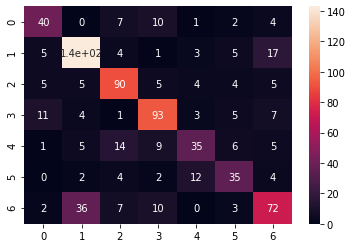

In [34]:
import seaborn as sns
sns.heatmap(cf, annot=True)

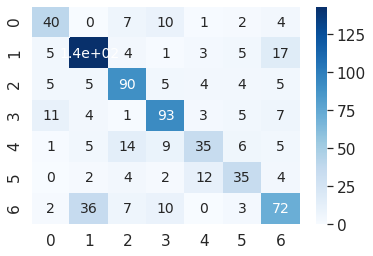

In [35]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf, annot=True, annot_kws={"size": 14}, cmap='Blues') # font size


In [36]:
eval_df.to_csv('eval.csv')

In [37]:
pred = pd.DataFrame(predictions, eval_df)
pred.to_csv('pred_chk.csv')

In [38]:
#from sklearn import metrics
#print(metrics.classification_report(eval_df['label'], predictions, target_names=df['label'].unique()))

In [39]:
#model.train_model(train_df)

#result, model_outputs, wrong_predictions = model.eval_model(eval_df)

#lst = []
#for arr in model_outputs:
#    lst.append(np.argmax(arr))
#true = eval_df['label'].tolist()
#predicted = lst
#sklearn.metrics.accuracy_score(true,predicted)

#https://stackoverflow.com/questions/64595546/higher-accuracy-using-simpletransformers-vs-transformers-library-with-bert

In [40]:
#print(metrics.classification_report(true_vals, predictions, target_names=df['label'].unique()))
#https://github.com/shudima/notebooks/blob/master/BERT_to_the_rescue.ipynb


#model.train_model(train_df)

#result, model_outputs, wrong_predictions = model.eval_model(eval_df)

#lst = []
#for arr in model_outputs:
#    lst.append(np.argmax(arr))
#true = eval_df['label'].tolist()
#predicted = lst
#sklearn.metrics.accuracy_score(true,predicted)